In [1]:
import pandas as pd

df1 = pd.read_csv("../data/Digital_Music.csv", sep = "|") 
df2 = pd.read_csv("../data/All_Beauty.csv", sep = "|") 
df3 = pd.read_csv("../data/Health_and_Personal_Care.csv", sep = "|") 

In [2]:
df1["sentiment"] = df1["rating"].apply(lambda x: "pozitif" if x >= 3 else "negatif")
df2["sentiment"] = df2["rating"].apply(lambda x: "pozitif" if x >= 3 else "negatif")
df3["sentiment"] = df3["rating"].apply(lambda x: "pozitif" if x >= 3 else "negatif")

df = pd.concat([df1, df2, df3], axis=0)

In [3]:
df.head()

,Unnamed: 0,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,sentiment
0,0,5.0,Nice,If i had a dollar for how many times I have pl...,[],B004RQ2IRG,B004RQ2IRG,AFUOYIZBU3MTBOLYKOJE5Z35MBDA,1618972613292,0,True,pozitif
1,0,5.0,Excellent,awesome sound - cant wait to see them in perso...,[],B0026UZEI0,B0026UZEI0,AHGAOIZVODNHYMNCBV4DECZH42UQ,1308167525000,0,True,pozitif
2,0,5.0,Great service,This is a great cd. Good music and plays well....,[],B0055JSYHC,B0055JSYHC,AFGEM6BXCYHUILEOA3P2ZYBEF2TA,1615838793006,0,True,pozitif
3,0,1.0,No good,"These are not real German singers, they have a...",[],B000F9SMUQ,B000F9SMUQ,AH3OG6QD6EDJGZRVCFKV4B66VWNQ,1405219741000,0,True,negatif
4,0,3.0,"Cool concept, so-so execution...",I first heard this playing in a Nagoya shop an...,[],B0049D1WVK,B0049D1WVK,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,1309029595000,0,False,pozitif


In [4]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)

In [5]:
# Gerekli kütüphaneleri içe aktarma
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# NLTK stopwords'ü indir (Eğer zaten yüklü değilse)
nltk.download('stopwords')

# İngilizce durak kelimeleri (stop words) al
stop_words = set(stopwords.words('english'))

# Metin temizleme fonksiyonu
def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # Küçük harfe çevir
        text = re.sub(f"[{string.punctuation}]", "", text)  # Noktalama işaretlerini kaldır
        text = " ".join([word for word in text.split() if word not in stop_words])  # Stopwords kaldır
        return text
    return ""

# Train ve Test setlerindeki metinleri temizleme
train_df["clean_text"] = train_df["text"].apply(clean_text)
test_df["clean_text"] = test_df["text"].apply(clean_text)

# TF-IDF vektörleştirme
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # 5000 kelimeye kadar vektörize et
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df["clean_text"])
X_test_tfidf = tfidf_vectorizer.transform(test_df["clean_text"])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\serve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
y_train = train_df["sentiment"].map({"pozitif": 1, "negatif": 0})
y_test = test_df["sentiment"].map({"pozitif": 1, "negatif": 0})

In [8]:
logreg = LogisticRegression(max_iter=10)
logreg.fit(X_train_tfidf, y_train)
y_pred_logreg = logreg.predict(X_test_tfidf)


c:\Users\serve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
rf = RandomForestClassifier(n_estimators=5, random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)

In [10]:
models = {
    "Logistic Regression": y_pred_logreg,
    "Random Forest": y_pred_rf
}

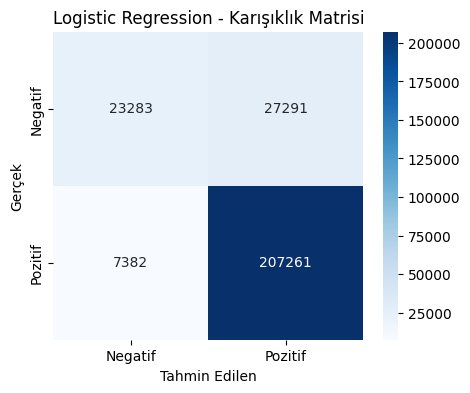

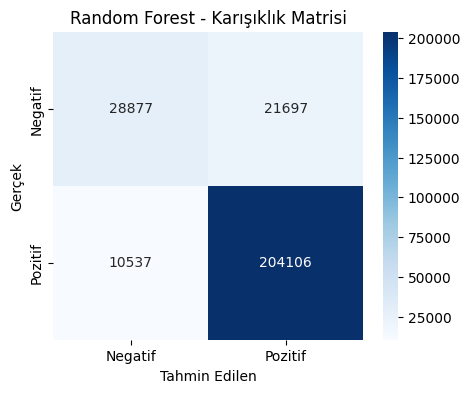

In [11]:
metrics_results = {}

for model_name, y_pred in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    metrics_results[model_name] = {"Accuracy": accuracy, "F1 Score": f1, "Confusion Matrix": confusion}
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=["Negatif", "Pozitif"], yticklabels=["Negatif", "Pozitif"])
    plt.xlabel("Tahmin Edilen")
    plt.ylabel("Gerçek")
    plt.title(f"{model_name} - Karışıklık Matrisi")
    plt.show()

c:\Users\serve\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


33153/33153 ━━━━━━━━━━━━━━━━━━━━ 6427s 194ms/step - accuracy: 0.8112 - loss: 0.4832 - val_accuracy: 0.9021 - val_loss: 0.2325
8289/8289 ━━━━━━━━━━━━━━━━━━━━ 684s 82ms/step


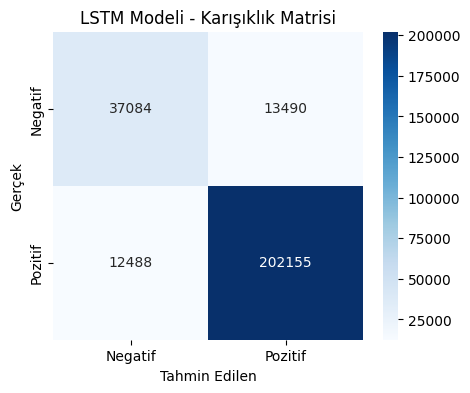

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder

MAX_NUM_WORDS = 10000  
MAX_SEQUENCE_LENGTH = 200  
EMBEDDING_DIM = 100  

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df["clean_text"])

X_train_seq = tokenizer.texts_to_sequences(train_df["clean_text"])
X_test_seq = tokenizer.texts_to_sequences(test_df["clean_text"])

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH, padding="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH, padding="post")

label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(train_df["sentiment"])
y_test_enc = label_encoder.transform(test_df["sentiment"])


model = Sequential([
    Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")  
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train_pad, y_train_enc, validation_data=(X_test_pad, y_test_enc),
                    epochs=1, batch_size=32, verbose=1)

y_pred_lstm = (model.predict(X_test_pad) > 0.5).astype("int32")

accuracy = accuracy_score(y_test_enc, y_pred_lstm)
f1 = f1_score(y_test_enc, y_pred_lstm)
confusion = confusion_matrix(y_test_enc, y_pred_lstm)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=["Negatif", "Pozitif"], yticklabels=["Negatif", "Pozitif"])
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("LSTM Modeli - Karışıklık Matrisi")
plt.show()

In [13]:
df1.head()

,Unnamed: 0,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,sentiment
0,0,5.0,Nice,If i had a dollar for how many times I have pl...,[],B004RQ2IRG,B004RQ2IRG,AFUOYIZBU3MTBOLYKOJE5Z35MBDA,1618972613292,0,True,pozitif
1,0,5.0,Excellent,awesome sound - cant wait to see them in perso...,[],B0026UZEI0,B0026UZEI0,AHGAOIZVODNHYMNCBV4DECZH42UQ,1308167525000,0,True,pozitif
2,0,5.0,Great service,This is a great cd. Good music and plays well....,[],B0055JSYHC,B0055JSYHC,AFGEM6BXCYHUILEOA3P2ZYBEF2TA,1615838793006,0,True,pozitif
3,0,1.0,No good,"These are not real German singers, they have a...",[],B000F9SMUQ,B000F9SMUQ,AH3OG6QD6EDJGZRVCFKV4B66VWNQ,1405219741000,0,True,negatif
4,0,3.0,"Cool concept, so-so execution...",I first heard this playing in a Nagoya shop an...,[],B0049D1WVK,B0049D1WVK,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,1309029595000,0,False,pozitif


In [14]:
df2.head()

,Unnamed: 0,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,sentiment
0,0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True,pozitif
1,0,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True,pozitif
2,0,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True,pozitif
3,0,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True,negatif
4,0,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True,pozitif


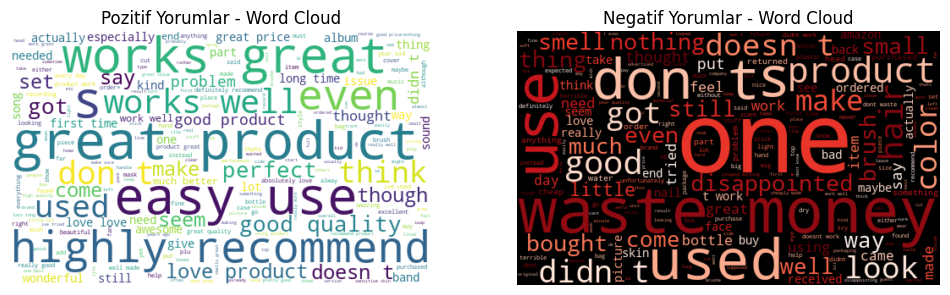

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Eğer "clean_text" sütunu yoksa, temizleme işlemi yapalım
if "clean_text" not in train_df.columns:
    train_df["clean_text"] = train_df["text"].astype(str).str.lower()

# Pozitif ve negatif yorumlar için ayrı word cloud oluşturma
positive_text = " ".join(train_df[train_df["sentiment"] == "pozitif"]["clean_text"])
negative_text = " ".join(train_df[train_df["sentiment"] == "negatif"]["clean_text"])

# Word Cloud görselleştirme
plt.figure(figsize=(12, 6))

# Pozitif yorumlar için Word Cloud
plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=500, height=300, background_color="white").generate(positive_text)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Pozitif Yorumlar - Word Cloud")

# Negatif yorumlar için Word Cloud
plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(width=500, height=300, background_color="black", colormap="Reds").generate(negative_text)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Negatif Yorumlar - Word Cloud")

# Görselleştirme
plt.show()


TypeError: imshow() missing 1 required positional argument: 'X'

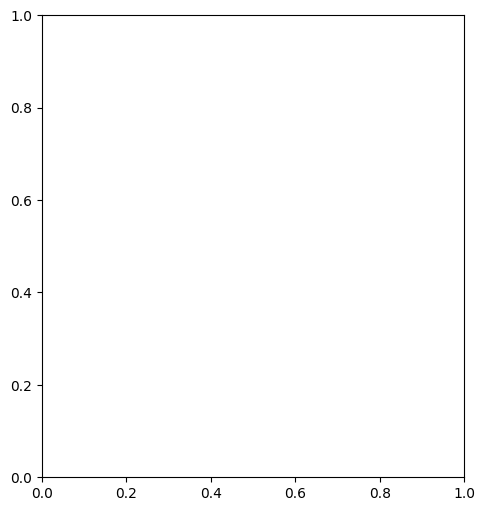

In [16]:
from wordcloud import WordCloud

positive_text = " ".join(train_df[train_df["sentiment"] == "pozitif"]["clean_text"])
negative_text = " ".join(train_df[train_df["sentiment"] == "negatif"]["clean_text"])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=500, height=300, background_color="white").generate(positive_text)
plt.imshow(wordcloud_positivnterpolation="bilinear")
plt.axis("off")
plt.title("Pozitif Yorumlar - Word Cloud")

plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(width=500, height=300, background_color="black", colormap="Reds").generate(negative_text)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Negatif Yorumlar - Word Cloud")


plt.show()

In [ ]:
plt.subplot(1, 2, 1)
wordcloud_positive = WordCloud(width=500, height=300, background_color="white").generate(positive_text)
plt.imshow(wordcloud_positive, interpolation="bilinear")  # Hata düzeltildi
plt.axis("off")
plt.title("Pozitif Yorumlar - Word Cloud")

plt.subplot(1, 2, 2)
wordcloud_negative = WordCloud(width=500, height=300, background_color="black", colormap="Reds").generate(negative_text)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Negatif Yorumlar - Word Cloud")

plt.show()  # Görselleştirme yapılır
